In [224]:
# Gabriela Aguilar
# Exploratory Data Analysis of Travel Review Ratings from UC Irvine Machine Learning Repository
# Google reviews on attractions from 24 categories across Europe are considered. Google user rating ranges from 1 to 5 and average user rating per category is calculated.


# **1. Acceso e Importación de Datos:**

*   Importación de las librerias necesarias.
*   Decodificación del repositorio de GitHub y acceso a la base de datos en formato CSV.

In [225]:
# Importando todas las librerias necesarias

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(style="whitegrid")
import plotly.express as px # For dynamic graphics
from io import StringIO
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, r2_score, accuracy_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [226]:
warnings.filterwarnings('ignore') # Ignorar mensajes de advertencia
plt.rcParams["figure.figsize"] = [10,5] # Tamaño de gráficas

In [227]:
# Carga de los Datos

# Acceso a la base de datos cargada a la repo de GitHub
datos = pd.read_csv("https://github.com/gabrielaaguiv5/ProjectI/raw/main/data/raw/google_review_ratings.csv")

datos.head(10)


,userid,churches,resorts,beaches,parks,theatres,museums,malls,zoos,restaurants,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.00,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
5,User 6,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.63,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
6,User 7,0.0,5.0,3.63,3.63,5.0,2.92,3.03,2.35,2.33,...,1.75,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
7,User 8,0.0,5.0,3.63,3.63,5.0,2.92,5.00,2.63,2.33,...,1.74,0.60,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
8,User 9,0.0,5.0,3.64,3.64,5.0,2.92,3.03,2.62,2.32,...,0.75,0.60,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
9,User 10,0.0,5.0,3.64,3.64,5.0,2.92,5.00,2.35,2.32,...,0.74,0.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **2. Análisis Descriptivo:**

*   Revisión del tipo de datos y cantidad de registros.
*   Identificación y tratamiento de valores faltantes o duplicados.
*   Estadísticas descriptivas (media, mediana, desviación estándar, percentiles, etc.).


In [228]:
# Revisión del tipo de datos y cantidad de registros.
datos.info()
print()
print('Datos:', datos.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 5456 non-null   object 
 1   churches               5456 non-null   float64
 2   resorts                5456 non-null   float64
 3   beaches                5456 non-null   float64
 4   parks                  5456 non-null   float64
 5   theatres               5456 non-null   float64
 6   museums                5456 non-null   float64
 7   malls                  5456 non-null   float64
 8   zoos                   5456 non-null   float64
 9   restaurants            5456 non-null   float64
 10  pubs/bars              5456 non-null   float64
 11  local services         5456 non-null   object 
 12  burger/pizza shops     5455 non-null   float64
 13  hotels/other lodgings  5456 non-null   float64
 14  juice bars             5456 non-null   float64
 15  art 

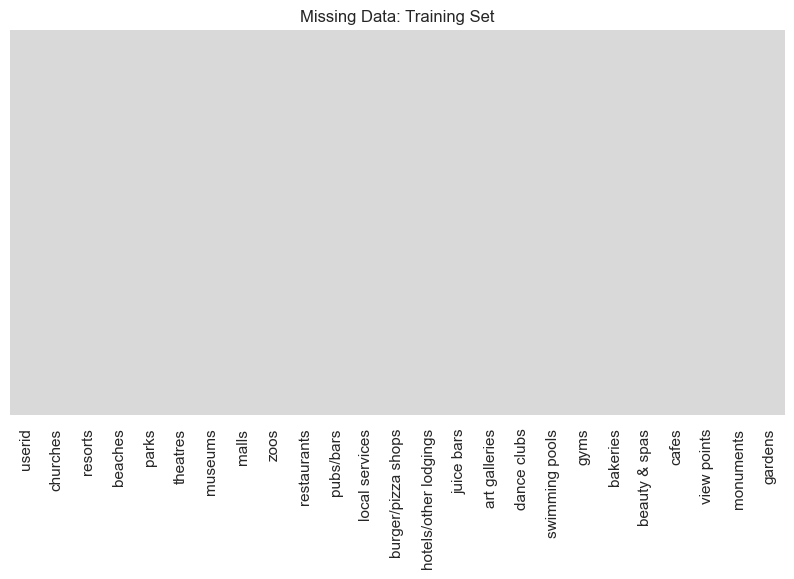

In [229]:
# Heatmap
sns.heatmap(datos.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [230]:
# Identificación de valores faltantes

print(datos.isnull().sum()) # Valores faltantes en cada fila

print()

print("Valores faltantes en la totalidad de la Database:")

print(datos.isnull().any().any()) # Valores faltantes en la totalidad de la Database, revisa cada columna y genera resultado consolidado

userid                   0
churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoos                     0
restaurants              0
pubs/bars                0
local services           0
burger/pizza shops       1
hotels/other lodgings    0
juice bars               0
art galleries            0
dance clubs              0
swimming pools           0
gyms                     0
bakeries                 0
beauty & spas            0
cafes                    0
view points              0
monuments                0
gardens                  1
dtype: int64

Valores faltantes en la totalidad de la Database:
True


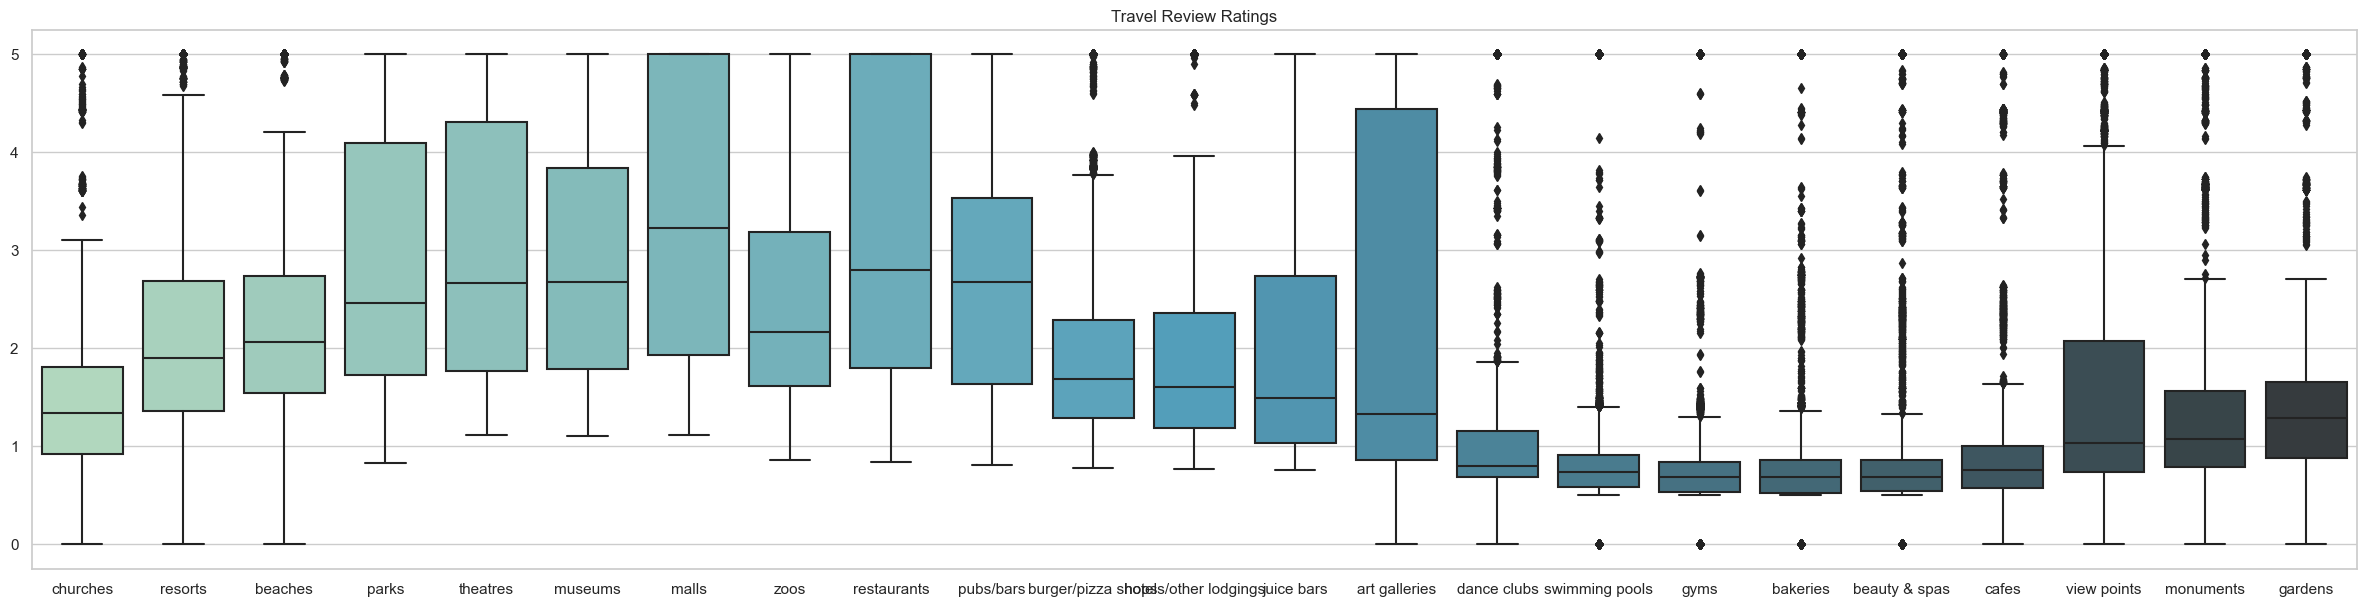

In [231]:
plt.figure(figsize = (30,7))
sns.boxplot(data = datos, palette= 'GnBu_d').set_title('Travel Review Ratings')
plt.show()

In [232]:
# Identificación de valores duplicados

print(datos.duplicated().sum()) # Filas duplicadas

print()

print("Filas duplicadas en la totalidad de la Database:")
print(datos[datos.duplicated()])

0

Filas duplicadas en la totalidad de la Database:
Empty DataFrame
Columns: [userid, churches, resorts, beaches, parks, theatres, museums, malls, zoos, restaurants, pubs/bars, local services, burger/pizza shops, hotels/other lodgings, juice bars, art galleries, dance clubs, swimming pools, gyms, bakeries, beauty & spas, cafes, view points, monuments, gardens]
Index: []

[0 rows x 25 columns]


In [233]:
# Corrección de Null y conversión a variables correspondientes según el contenido de cada columna

# Ajustar tipo de variables según el contenido de cada columna

category_columns = ['userid']
columnas_numericas = ['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums',
    'malls', 'zoos', 'restaurants', 'pubs/bars', 'local services', 'burger/pizza shops',
    'hotels/other lodgings', 'juice bars', 'art galleries', 'dance clubs', 'swimming pools',
    'gyms', 'bakeries', 'beauty & spas', 'cafes', 'view points', 'monuments', 'gardens']

# Conversión a tipo de datos correspondiente
datos[category_columns] = datos[category_columns].astype('category')
# Aplicando función para corregir datos según error code tras tratar de convertir a columnas_numericas

def limpiezaNull(x):
    try:
        # Reemplazando caractéres no numéricos (excepto por '.') por un espacio vacio
        return float(str(x).replace('\t', '').replace(' ',''))
    except ValueError:
        # En casos en que el retorno es Nan
        return np.nan

datos[columnas_numericas] = datos[columnas_numericas].apply(pd.to_numeric, errors='coerce').fillna(0)


In [234]:
# Revisión de datos corregidos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   userid                 5456 non-null   category
 1   churches               5456 non-null   float64 
 2   resorts                5456 non-null   float64 
 3   beaches                5456 non-null   float64 
 4   parks                  5456 non-null   float64 
 5   theatres               5456 non-null   float64 
 6   museums                5456 non-null   float64 
 7   malls                  5456 non-null   float64 
 8   zoos                   5456 non-null   float64 
 9   restaurants            5456 non-null   float64 
 10  pubs/bars              5456 non-null   float64 
 11  local services         5456 non-null   float64 
 12  burger/pizza shops     5456 non-null   float64 
 13  hotels/other lodgings  5456 non-null   float64 
 14  juice bars             5456 non-null   f

In [235]:
# Asignar nombres de categorías a columnas correspondientes

datos.rename(columns={
    'userid': 'Unique user id',
    'churches': 'Avg_Churches',
    'resorts': 'Avg_Resorts',
    'beaches': 'Avg_Beaches',
    'parks': 'Avg_Parks',
    'theatres': 'Avg_Theatres',
    'museums': 'Avg_Museums',
    'malls': 'Avg_Malls',
    'zoos': 'Avg_Zoo',
    'restaurants': 'Avg_Restaurants',
    'pubs/bars': 'Avg_Pubs/bars',
    'local services': 'Avg_Local services',
    'burger/pizza shops': 'Avg_Burger/pizza shops',
    'hotels/other lodgings': 'Avg_Hotels/other lodgings',
    'juice bars': 'Avg_Juice bars',
    'art galleries': 'Avg_Art galleries',
    'dance clubs': 'Avg_Dance clubs',
    'swimming pools': 'Avg_Swimming pools',
    'gyms': 'Avg_Gyms',
    'bakeries': 'Avg_Bakeries',
    'beauty & spas': 'Avg_Beauty & spas',
    'cafes': 'Avg_Cafes',
    'view points': 'Avg_View points',
    'monuments': 'Avg_Monuments',
    'gardens': 'Avg_Gardens',
}, inplace=True)

In [236]:
# Revisión de datos actualizados
datos.info()
print()
print("Null Data:",datos.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Unique user id             5456 non-null   category
 1   Avg_Churches               5456 non-null   float64 
 2   Avg_Resorts                5456 non-null   float64 
 3   Avg_Beaches                5456 non-null   float64 
 4   Avg_Parks                  5456 non-null   float64 
 5   Avg_Theatres               5456 non-null   float64 
 6   Avg_Museums                5456 non-null   float64 
 7   Avg_Malls                  5456 non-null   float64 
 8   Avg_Zoo                    5456 non-null   float64 
 9   Avg_Restaurants            5456 non-null   float64 
 10  Avg_Pubs/bars              5456 non-null   float64 
 11  Avg_Local services         5456 non-null   float64 
 12  Avg_Burger/pizza shops     5456 non-null   float64 
 13  Avg_Hotels/other lodgings  5456 n

In [237]:
# 3. Basic Info
# Estadísticas descriptivas (media, mediana, desviación estándar, percentiles, etc.).

columnas_numericas = [col for col in datos.columns if col.startswith("Avg")]

CNum = datos[columnas_numericas]

# Medidas de tendencia central

CNum.describe()

,Avg_Churches,Avg_Resorts,Avg_Beaches,Avg_Parks,Avg_Theatres,Avg_Museums,Avg_Malls,Avg_Zoo,Avg_Restaurants,Avg_Pubs/bars,...,Avg_Art galleries,Avg_Dance clubs,Avg_Swimming pools,Avg_Gyms,Avg_Bakeries,Avg_Beauty & spas,Avg_Cafes,Avg_View points,Avg_Monuments,Avg_Gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560469
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171840
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [238]:
# Medidas de variabilidad

#Varianza
varianza = CNum.var()

#Desviación estandar
desvest = CNum.std()

#Coeficiente de variación
CV = (desvest/CNum.mean())*100

#Rango
Rango = CNum.max() - CNum.min()

# Imprimir datos en forma de tabla
from tabulate import tabulate

table_data = []
for col in CNum.columns:
    table_data.append([
        col,
        varianza[col],
        desvest[col],
        CV[col],
        Rango[col]
    ])

headers = ["Variable", "Varianza", "Desviación estándar", "Coeficiente de variación", "Rango"]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------------------------+------------+-----------------------+----------------------------+---------+
| Variable                  |   Varianza |   Desviación estándar |   Coeficiente de variación |   Rango |
+===========================+============+=======================+============================+=========+
| Avg_Churches              |   0.684929 |              0.827604 |                    56.8519 |    5    |
+---------------------------+------------+-----------------------+----------------------------+---------+
| Avg_Resorts               |   2.02048  |              1.42144  |                    61.2766 |    5    |
+---------------------------+------------+-----------------------+----------------------------+---------+
| Avg_Beaches               |   1.55704  |              1.24782  |                    50.1265 |    5    |
+---------------------------+------------+-----------------------+----------------------------+---------+
| Avg_Parks                 |   1.7139   |    

In [239]:
# Medidas de forma

# Asimetría
asimetria = CNum.skew()
# Curtosis
curtosis = CNum.kurtosis()

# Imprimir datos en forma de tabla
from tabulate import tabulate

table_data = []
for col in CNum.columns:
    table_data.append([
        col,
        asimetria[col],
        curtosis[col]
    ])

headers = ["Variable", "Asimetría", "Curtosis"]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------------------------+-------------+------------+
| Variable                  |   Asimetría |   Curtosis |
+===========================+=============+============+
| Avg_Churches              |    1.66658  |  4.76233   |
+---------------------------+-------------+------------+
| Avg_Resorts               |    0.883645 | -0.397317  |
+---------------------------+-------------+------------+
| Avg_Beaches               |    1.08485  | -0.11516   |
+---------------------------+-------------+------------+
| Avg_Parks                 |    0.706732 | -0.979327  |
+---------------------------+-------------+------------+
| Avg_Theatres              |    0.487032 | -1.26603   |
+---------------------------+-------------+------------+
| Avg_Museums               |    0.558141 | -1.07159   |
+---------------------------+-------------+------------+
| Avg_Malls                 |    0.017513 | -1.60457   |
+---------------------------+-------------+------------+
| Avg_Zoo                   |  

In [240]:
# Medidas de posición

Q1 = CNum.quantile(0.25)
Q2 = CNum.quantile(0.50)
Q3 = CNum.quantile(0.75)

# Imprimir datos en forma de tabla
from tabulate import tabulate

table_data = []
for col in CNum.columns:
    table_data.append([
        col,
        Q1[col],
        Q2[col],
        Q3[col]
    ])

headers = ["Variable", "Percentil 25", "Percentil 50", "Percentil 75"]

print(tabulate(table_data, headers=headers, tablefmt="grid"))


+---------------------------+----------------+----------------+----------------+
| Variable                  |   Percentil 25 |   Percentil 50 |   Percentil 75 |
+===========================+================+================+================+
| Avg_Churches              |           0.92 |          1.34  |         1.81   |
+---------------------------+----------------+----------------+----------------+
| Avg_Resorts               |           1.36 |          1.905 |         2.6825 |
+---------------------------+----------------+----------------+----------------+
| Avg_Beaches               |           1.54 |          2.06  |         2.74   |
+---------------------------+----------------+----------------+----------------+
| Avg_Parks                 |           1.73 |          2.46  |         4.0925 |
+---------------------------+----------------+----------------+----------------+
| Avg_Theatres              |           1.77 |          2.67  |         4.3125 |
+---------------------------

# **3. Asignación de Datos para Modelo de ML:**

Se asignan valores correspondientes a "Ciudades". Teniendo en cuenta la información suministrada por la base de datos (la cual indica que los ratings corresponden a ciudades de Europa https://archive.ics.uci.edu/dataset/485/tarvel+review+ratings), se asignan nombres de ciudades de forma aleatoria con el fin de enfocar el análisis en ubicaciones específicas, facilitando así la construcción del modelo predictivo final.

In [241]:
# Agregar ciudades al random

city_list = ['London', 'Paris', 'Rome', 'Berlin', 'Barcelona', 'Amsterdam', 'Vienna', 'Prague', 'Madrid', 'Lisbon']
datos['City'] = [random.choice(city_list) for _ in range(len(datos))]
columnas = ['City'] + [col for col in datos.columns if col != 'City'] # Organizar ciudades al inicio
datos = datos[columnas]

datos['City'] = datos['City'].astype('category')

In [242]:
datos.head(10) # Nuevo orden de columnas

,City,Unique user id,Avg_Churches,Avg_Resorts,Avg_Beaches,Avg_Parks,Avg_Theatres,Avg_Museums,Avg_Malls,Avg_Zoo,...,Avg_Art galleries,Avg_Dance clubs,Avg_Swimming pools,Avg_Gyms,Avg_Bakeries,Avg_Beauty & spas,Avg_Cafes,Avg_View points,Avg_Monuments,Avg_Gardens
0,Vienna,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.35,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,Amsterdam,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.00,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,Vienna,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,Madrid,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.00,2.35,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,Paris,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
5,Madrid,User 6,0.0,0.0,3.63,3.63,5.0,2.92,5.00,2.63,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
6,Paris,User 7,0.0,5.0,3.63,3.63,5.0,2.92,3.03,2.35,...,1.75,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
7,Paris,User 8,0.0,5.0,3.63,3.63,5.0,2.92,5.00,2.63,...,1.74,0.60,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
8,Prague,User 9,0.0,5.0,3.64,3.64,5.0,2.92,3.03,2.62,...,0.75,0.60,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
9,Barcelona,User 10,0.0,5.0,3.64,3.64,5.0,2.92,5.00,2.35,...,0.74,0.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [243]:
import os # Extrayendo una nueva versión de los datos, sin valores nulos e incluyendo las ciudades.

os.makedirs('data', exist_ok=True)
datos.to_csv('data/my_data.csv', index=False)

file_path = os.path.abspath('data/my_data.csv')
print(f"Saved to: {file_path}")

Saved to: C:\Users\gabri\AppData\Local\Programs\Microsoft VS Code\data\my_data.csv


# **4. Generación de Gráficas:**

*   Creación de gráficas para el análisis de datos.

In [244]:
# Melt a las columnas con ratings, manteniendo City y User ID como identificador de variables
df_melted = datos.melt(
    id_vars=['City', 'Unique user id'],
    var_name='Category',
    value_name='Rating'
)

# Resumiendo nombres para facilitar Melt
df_melted['Category'] = df_melted['Category'].str.replace('Avg_', '', regex=False)
df_melted['Rating'] = df_melted['Rating'].round(0).astype(int)

df_melted

,City,Unique user id,Category,Rating
0,Vienna,User 1,Churches,0
1,Amsterdam,User 2,Churches,0
2,Vienna,User 3,Churches,0
3,Madrid,User 4,Churches,0
4,Paris,User 5,Churches,0
...,...,...,...,...
130939,Madrid,User 5452,Gardens,2
130940,Rome,User 5453,Gardens,1
130941,Madrid,User 5454,Gardens,1
130942,Amsterdam,User 5455,Gardens,1


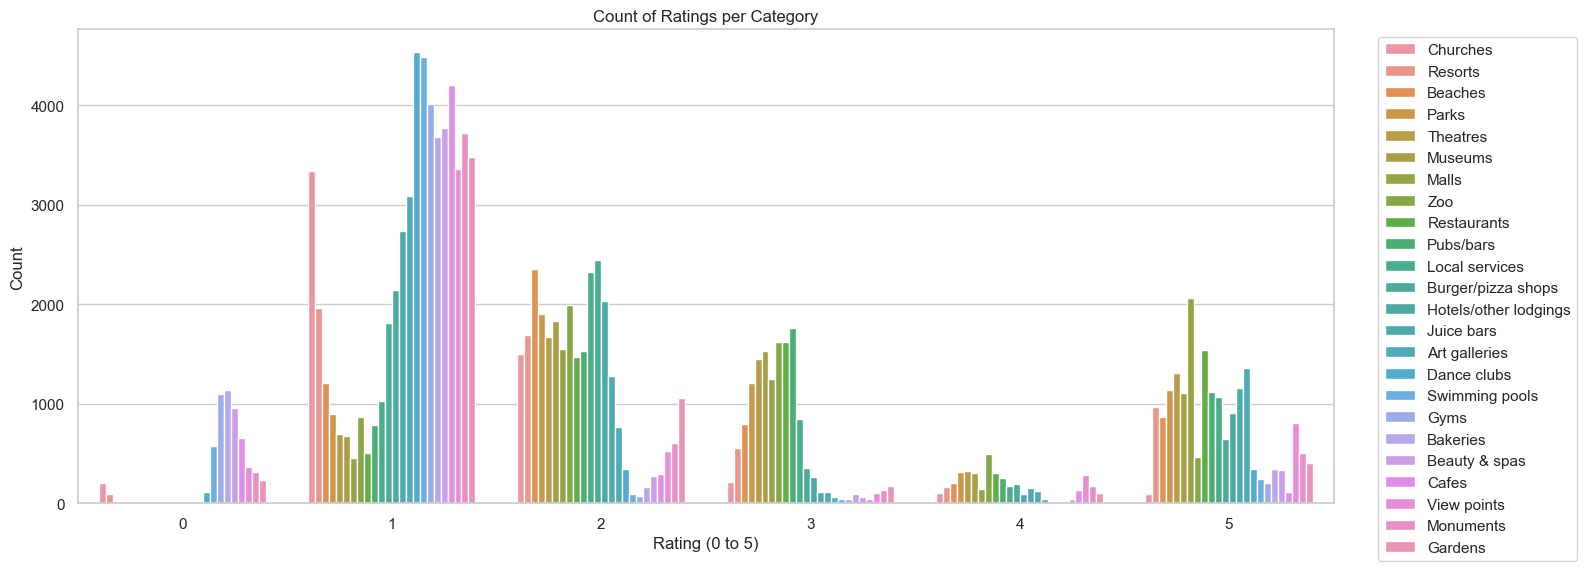

In [245]:
# Crear un countplot incluyendo todas las categorías
plt.figure(figsize=(16, 6))
sns.countplot(data=df_melted, x='Rating', hue='Category') # Clasificando por Ratings

plt.title('Count of Ratings per Category')
plt.xlabel('Rating (0 to 5)')
plt.ylabel('Count')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

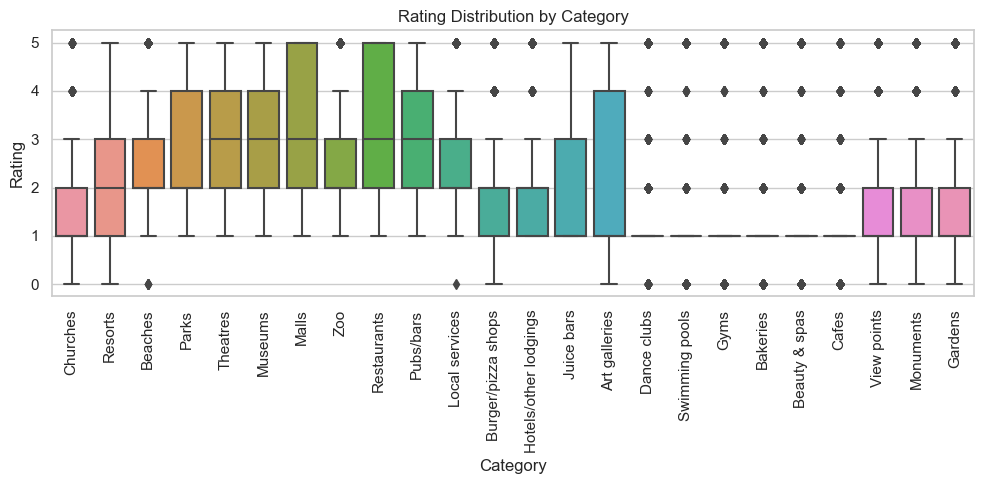

In [246]:
# Crear un boxplot incluyendo todas las categorías
sns.boxplot(data=df_melted, x='Category', y='Rating') # Clasificando por Categoría
plt.xticks(rotation=90)
plt.title('Rating Distribution by Category')
plt.tight_layout()
plt.show()

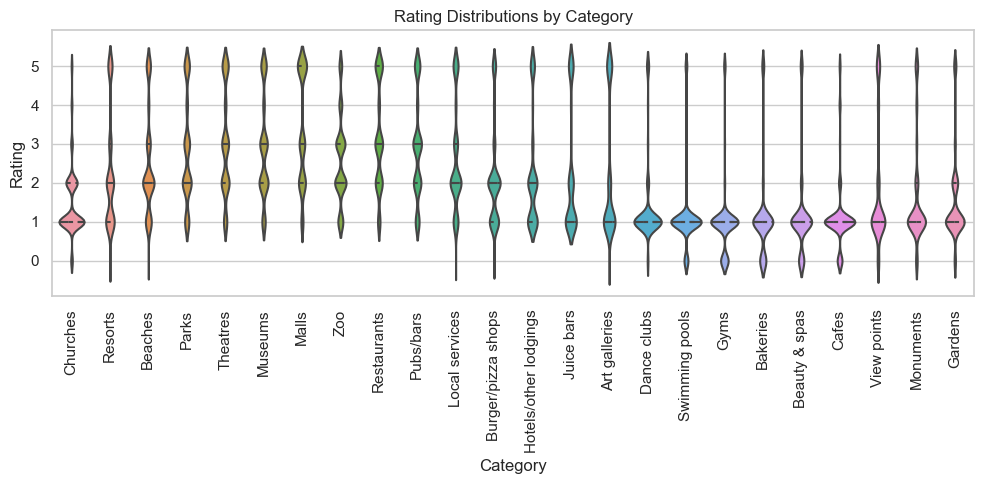

In [247]:
# Crear un violinplot incluyendo todas las categorías, para comparar la distribución de ratings entre las categorías.
sns.violinplot(data=df_melted, x='Category', y='Rating', inner='quartile') # Clasificando por Categoría
plt.xticks(rotation=90)
plt.title('Rating Distributions by Category')
plt.tight_layout()
plt.show()

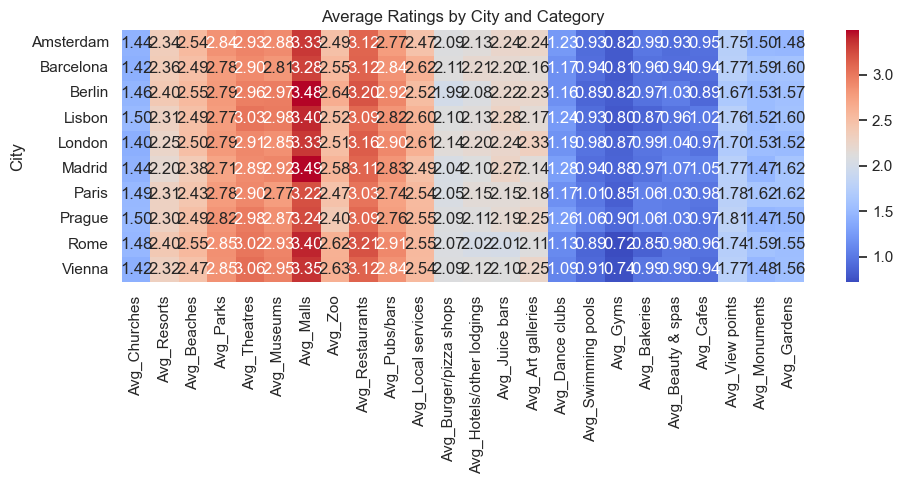

In [248]:
# Visualización con heatmap del promedio de ratings en las diferentes categorías y ciudades.
df_avg = datos.drop(columns='Unique user id').groupby('City').mean()
sns.heatmap(df_avg, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Average Ratings by City and Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

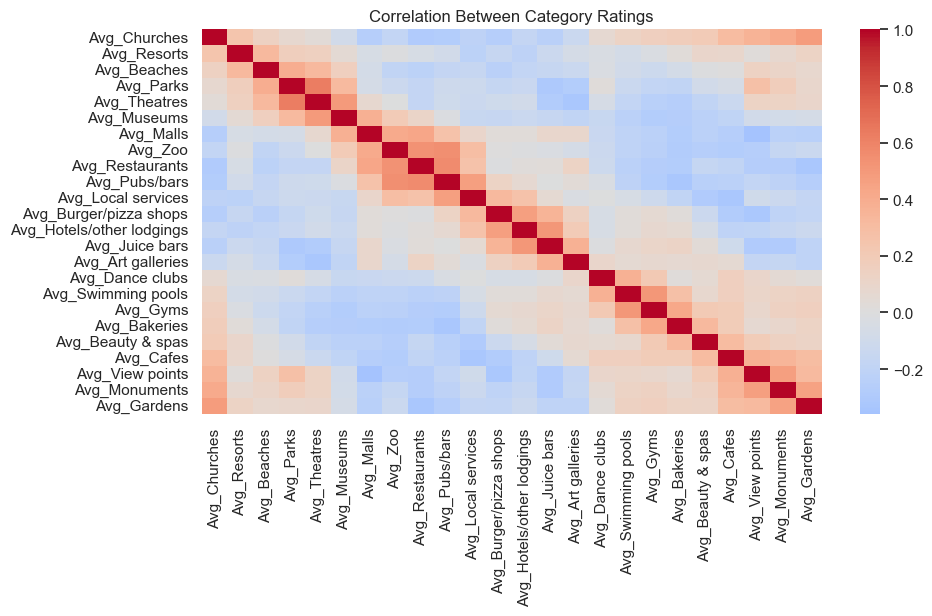

In [249]:
# Visualización con heatmap de la relación entre los ratings de las diferentes categorías.
corr = datos.drop(columns=['City', 'Unique user id']).corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Between Category Ratings')
plt.show()

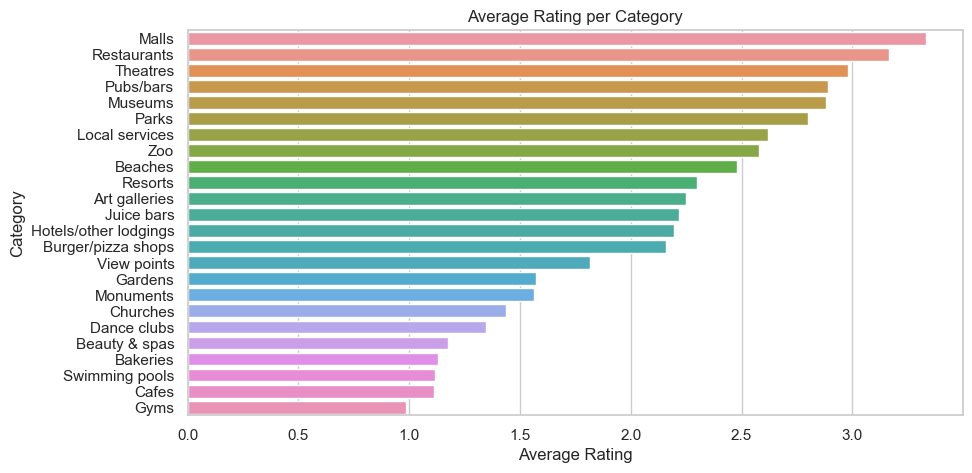

In [250]:
# Crear barplot horizontal relacionando los ratings y todas las categorías.
category_means = df_melted.groupby('Category')['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=category_means.values, y=category_means.index)
plt.title('Average Rating per Category')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

# **5. Machine Learning:**


## Normalización de los Datos

In [251]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   City                       5456 non-null   category
 1   Unique user id             5456 non-null   category
 2   Avg_Churches               5456 non-null   float64 
 3   Avg_Resorts                5456 non-null   float64 
 4   Avg_Beaches                5456 non-null   float64 
 5   Avg_Parks                  5456 non-null   float64 
 6   Avg_Theatres               5456 non-null   float64 
 7   Avg_Museums                5456 non-null   float64 
 8   Avg_Malls                  5456 non-null   float64 
 9   Avg_Zoo                    5456 non-null   float64 
 10  Avg_Restaurants            5456 non-null   float64 
 11  Avg_Pubs/bars              5456 non-null   float64 
 12  Avg_Local services         5456 non-null   float64 
 13  Avg_Burger/pizza shops     5456 n

In [252]:
df = datos.drop(columns=['Unique user id'])

In [253]:
x = df.drop('City', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = df['City'] # y is the column we're trying to predict

# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101, stratify=y)

In [254]:
df.shape

(5456, 25)

In [255]:
x_train.shape, y_train.shape

((4364, 24), (4364,))

In [256]:
x_train

,Avg_Churches,Avg_Resorts,Avg_Beaches,Avg_Parks,Avg_Theatres,Avg_Museums,Avg_Malls,Avg_Zoo,Avg_Restaurants,Avg_Pubs/bars,...,Avg_Art galleries,Avg_Dance clubs,Avg_Swimming pools,Avg_Gyms,Avg_Bakeries,Avg_Beauty & spas,Avg_Cafes,Avg_View points,Avg_Monuments,Avg_Gardens
1973,1.15,1.18,1.72,1.74,5.00,3.13,5.00,3.94,5.00,5.00,...,1.07,0.58,0.56,0.55,0.56,0.59,0.98,1.36,1.16,1.14
2717,2.34,1.71,1.57,1.15,1.14,1.14,1.16,0.89,1.48,0.84,...,1.06,1.07,5.00,1.03,5.00,5.00,3.79,5.00,2.59,2.59
3412,1.37,1.61,1.42,2.56,3.19,3.20,5.00,5.00,5.00,5.00,...,5.00,1.48,0.51,0.50,0.52,0.64,0.59,1.47,1.36,1.36
2507,0.00,0.00,1.45,1.42,1.41,1.42,1.59,1.47,2.66,2.67,...,5.00,0.83,0.82,0.83,0.86,1.03,0.51,0.00,0.00,0.00
5396,2.61,2.61,2.45,2.23,1.83,1.32,1.30,1.30,1.44,1.60,...,0.84,0.96,0.94,0.95,0.90,0.87,4.40,3.68,3.63,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,0.98,5.00,5.00,2.55,2.72,2.72,5.00,3.19,3.18,2.67,...,4.44,0.73,0.69,0.69,0.71,3.19,0.93,0.93,0.94,0.96
1429,0.87,0.89,2.89,5.00,5.00,5.00,5.00,1.45,1.44,1.48,...,0.80,0.81,0.83,1.17,0.81,0.78,0.77,0.78,0.80,0.83
5388,2.60,2.45,2.43,1.33,1.30,1.29,1.28,1.29,1.59,1.19,...,0.96,0.95,0.86,0.88,0.84,5.00,3.70,3.65,2.53,2.50
1803,0.76,5.00,3.63,2.70,2.29,2.74,2.65,1.44,1.95,1.39,...,5.00,0.75,0.74,0.74,5.00,0.82,0.76,0.84,0.73,0.74


In [257]:
y_train

1973       Prague
2717       Prague
3412       Prague
2507       Vienna
5396       Vienna
          ...    
2185       Lisbon
1429       London
5388       Lisbon
1803        Paris
3354    Amsterdam
Name: City, Length: 4364, dtype: category
Categories (10, object): ['Amsterdam', 'Barcelona', 'Berlin', 'Lisbon', ..., 'Paris', 'Prague', 'Rome', 'Vienna']

In [258]:
x_test.shape, y_test.shape

((1092, 24), (1092,))

In [259]:
x_test

,Avg_Churches,Avg_Resorts,Avg_Beaches,Avg_Parks,Avg_Theatres,Avg_Museums,Avg_Malls,Avg_Zoo,Avg_Restaurants,Avg_Pubs/bars,...,Avg_Art galleries,Avg_Dance clubs,Avg_Swimming pools,Avg_Gyms,Avg_Bakeries,Avg_Beauty & spas,Avg_Cafes,Avg_View points,Avg_Monuments,Avg_Gardens
151,0.84,1.49,1.42,1.43,1.43,2.28,5.00,4.04,5.00,5.00,...,5.00,0.70,0.69,0.69,0.72,0.90,0.86,0.83,0.81,0.83
110,1.33,1.27,1.32,1.33,4.89,4.76,5.00,2.74,3.40,1.60,...,0.80,0.81,1.03,0.87,1.15,0.67,0.68,0.70,0.72,0.75
1794,0.77,3.62,5.00,5.00,2.67,2.68,2.55,1.42,1.71,1.43,...,0.85,0.76,0.74,0.75,0.77,0.79,0.76,0.74,0.73,0.74
507,2.48,2.96,5.00,5.00,5.00,1.71,1.68,1.63,1.68,2.71,...,1.03,1.05,1.08,0.63,0.61,0.60,0.62,5.00,5.00,1.76
2402,0.94,5.00,1.66,2.20,2.89,3.03,5.00,5.00,5.00,1.36,...,1.61,0.68,0.66,0.68,0.69,0.71,0.94,0.92,0.90,0.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3773,0.80,5.00,1.43,1.44,1.47,1.48,5.00,4.12,5.00,5.00,...,4.84,0.65,0.63,0.64,0.67,0.80,0.81,0.80,0.77,0.77
3665,0.94,3.79,3.74,2.71,2.67,2.67,2.45,1.81,1.81,1.24,...,1.50,0.77,0.75,0.75,5.00,0.97,0.96,0.97,0.91,0.91
5240,0.74,0.76,1.61,1.58,1.57,1.58,5.00,1.62,2.50,3.01,...,5.00,0.69,0.68,0.69,1.10,0.73,0.74,0.72,0.71,0.72
4591,1.29,1.31,4.15,4.14,5.00,2.94,4.76,2.42,1.59,2.44,...,0.88,1.08,1.13,0.56,0.57,0.59,0.61,5.00,5.00,1.31


## Model

In [262]:
# Fit
# Import model
from sklearn.linear_model import LogisticRegression

# Create instance of model
lreg = LogisticRegression()

# Pass training data into model
lreg.fit(x_train, y_train)

LogisticRegression()

In [263]:
dir(lreg)

['C',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_metadata_routing',
 'get_params',
 'intercept_',
 'intercept_

In [264]:
lreg.feature_names_in_

array(['Avg_Churches', 'Avg_Resorts', 'Avg_Beaches', 'Avg_Parks',
       'Avg_Theatres', 'Avg_Museums', 'Avg_Malls', 'Avg_Zoo',
       'Avg_Restaurants', 'Avg_Pubs/bars', 'Avg_Local services',
       'Avg_Burger/pizza shops', 'Avg_Hotels/other lodgings',
       'Avg_Juice bars', 'Avg_Art galleries', 'Avg_Dance clubs',
       'Avg_Swimming pools', 'Avg_Gyms', 'Avg_Bakeries',
       'Avg_Beauty & spas', 'Avg_Cafes', 'Avg_View points',
       'Avg_Monuments', 'Avg_Gardens'], dtype=object)

In [265]:
lreg.get_params(())

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [266]:
y_pred_lreg = lreg.predict(x_test)

In [267]:
y_pred_lreg

array(['Barcelona', 'Berlin', 'Barcelona', ..., 'Prague', 'Barcelona',
       'Madrid'], dtype=object)

In [268]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


Logistic Regression


Confusion Matrix
[[12 19  6  9 10  9  7 10 15  4]
 [14 17 12  5 12  5 10 18 14  5]
 [ 9 30 10  8 13  9 13 11 22  5]
 [10 29  8  4 14  8  6 19 18  5]
 [ 8 19  7  8 12  5  8 10 20  8]
 [10 16  9  7 12  6 15  7 12  7]
 [ 9 23  6  7 11  5  7 11 23  5]
 [ 6 23  7  6 10  7  6  9 25  5]
 [12 18  4  7 13 10 11 11 17  5]
 [ 5 16  9  7 11 10 12 15 13  5]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

   Amsterdam       0.13      0.12      0.12       101
   Barcelona       0.08      0.15      0.11       112
      Berlin       0.13      0.08      0.10       130
      Lisbon       0.06      0.03      0.04       121
      London       0.10      0.11      0.11       105
      Madrid       0.08      0.06      0.07       101
       Paris       0.07      0.07      0.07       107
      Prague       0.07      0.09      0.08       104
        Rome       0.09      0.16      0

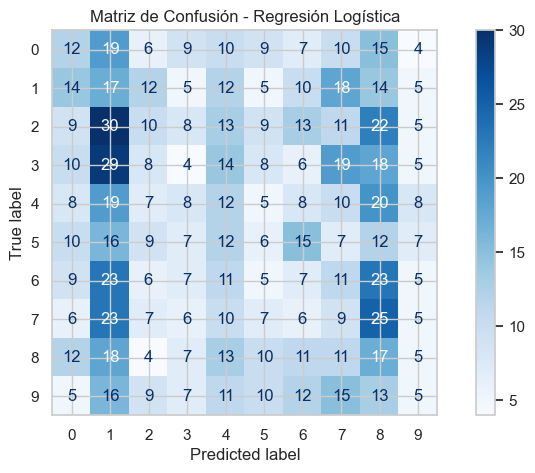

In [269]:
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
conf_matrix = confusion_matrix(y_test, y_pred_lreg)
print(conf_matrix)
print('--' * 40)

# Reporte de Clasificación
print('Classification Report')
print(classification_report(y_test, y_pred_lreg))

# Precisión
print('--' * 40)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100, 2)
print('Accuracy', logreg_accuracy, '%')

# Graficar la Matriz de Confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

In [300]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Select all feature columns (excluding City and Unique user id)
categories = datos.columns.difference(['City', 'Unique user id'])

# Compute the mean of ratings per city to check correlations
city_avg_ratings = datos.groupby('City')[categories].mean()

# Calculate correlations between features and average city ratings
correlation_with_city = city_avg_ratings.corr()
top_features = correlation_with_city.abs().mean(axis=1).sort_values(ascending=False).head(3)

# Prepare features and target variable
X_top3 = datos[top_features.index]
y_top3 = datos['City']

# Convert the city labels to integer labels
label_encoder = LabelEncoder()
y_top3_encoded = label_encoder.fit_transform(y_top3)

# Standardize the features
scaler = StandardScaler()
X_scaled_top3 = scaler.fit_transform(X_top3)

# Initialize the KNN classifier (with k=5 neighbors)
knn_model = KNeighborsClassifier(n_neighbors=1)

# Train the model using the top 3 features
knn_model.fit(X_scaled_top3, y_top3_encoded)

# Evaluate the model's accuracy on the training set
accuracy_knn = knn_model.score(X_scaled_top3, y_top3_encoded)

print(f"Accuracy of the KNN model: {accuracy_knn * 100:.2f}%")

Accuracy of the KNN model: 72.03%


Confusion Matrix:
[[383  24  18  18  14   9  18   9  26  22]
 [ 15 441  16  11  17  14  20  10  31  18]
 [ 10  13 389  21  14  21  13  12  25  26]
 [ 10  15  21 412  12  14  16  12  24  12]
 [ 14  21  21  24 371  18  15  11  27  25]
 [ 20  16  12  25  10 372  15  11  28  18]
 [ 11  13  18  17  10  19 384  17  24  26]
 [ 13  18  11  17  10  13  16 403  26  16]
 [ 23  20  10  11  21  21  11  12 395  23]
 [ 15  22   8  22  10  16  20   8  26 380]]


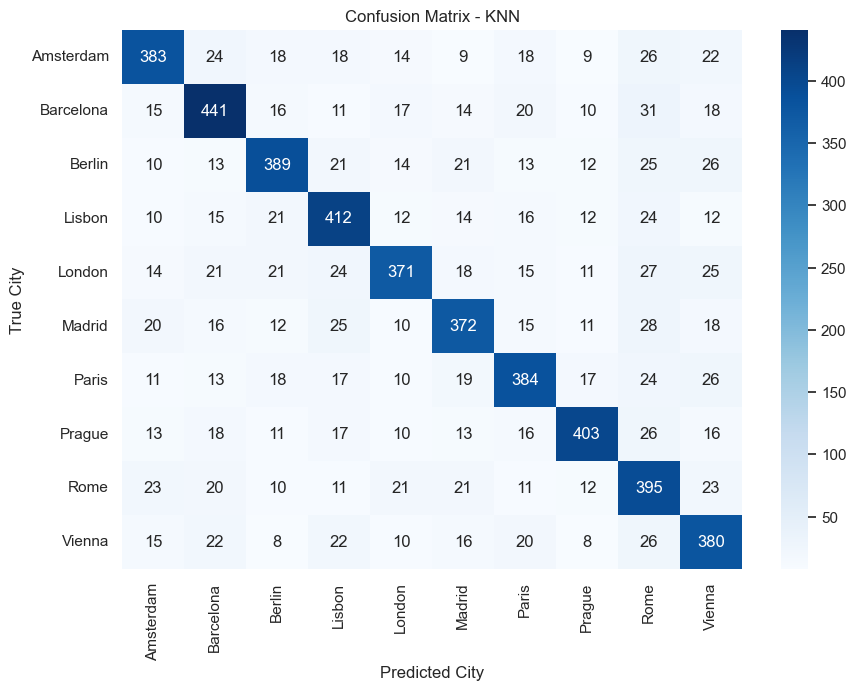

In [301]:

# Predict the cities on the training set
y_pred_knn = knn_model.predict(X_scaled_top3)

# Compute the confusion matrix
cm = confusion_matrix(y_top3_encoded, y_pred_knn)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Predict the cities on the training set
y_pred_knn = knn_model.predict(X_scaled_top3)

# Compute the confusion matrix
cm = confusion_matrix(y_top3_encoded, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted City')
plt.ylabel('True City')
plt.show()

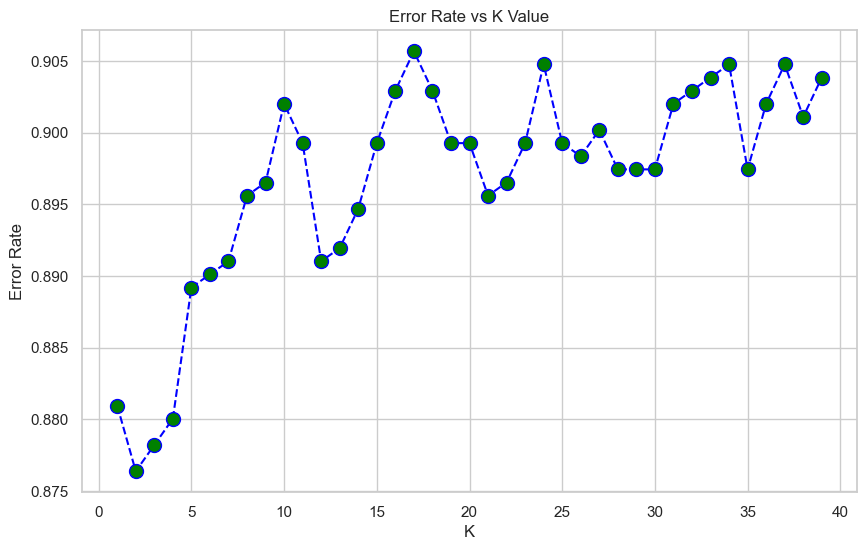

In [303]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_top3, y_top3_encoded, test_size=0.2, random_state=42)

# Function to find the ideal K value
error_rate = []

# Loop through values of k from 1 to 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot error rate vs K value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='--', marker='o', markerfacecolor='green', markersize=10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [283]:
# Select all feature columns (excluding City and Unique user id)
categories = datos.columns.difference(['City', 'Unique user id'])

# Compute the mean of ratings per city to check correlations
city_avg_ratings = datos.groupby('City')[categories].mean()

# Calculate correlations between features and average city ratings
correlation_with_city = city_avg_ratings.corr()
top_features = correlation_with_city.abs().mean(axis=1).sort_values(ascending=False).head(3)

# Prepare features and target variable
X_top3 = datos[top_features.index]
y_top3 = datos['City']

# Standardize the features
scaler = StandardScaler()
X_scaled_top3 = scaler.fit_transform(X_top3)

# Initialize and train Random Forest Classifier
clf_top3 = RandomForestClassifier(random_state=42)
clf_top3.fit(X_scaled_top3, y_top3)

# Evaluate the model's accuracy on the training set
accuracy = clf_top3.score(X_scaled_top3, y_top3)

print(f"Accuracy of the Random Forest model: {accuracy * 100:.2f}%")

Accuracy of the Random Forest model: 73.81%


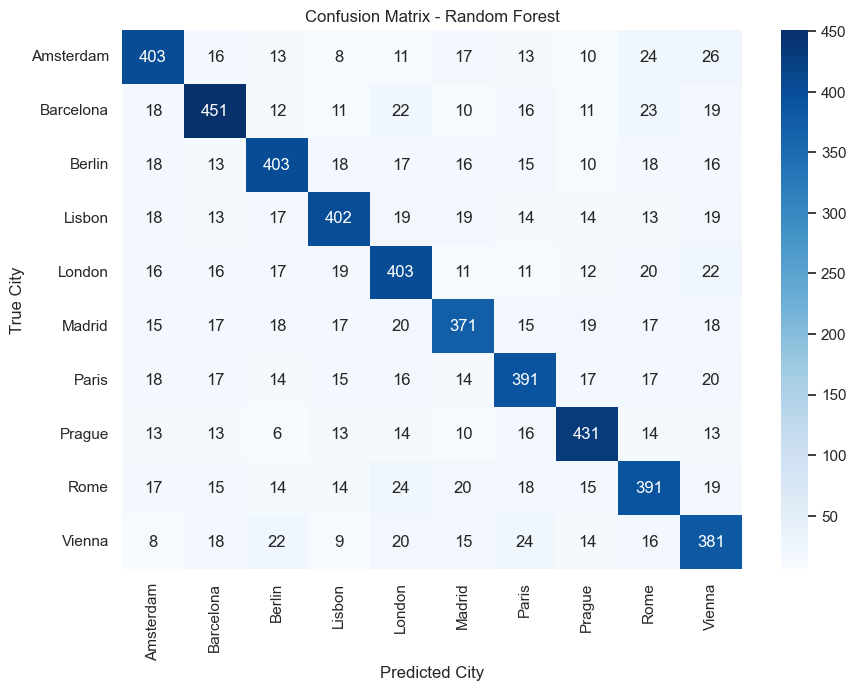

In [307]:
# Predict on the training set
y_pred_rf = clf_top3.predict(X_scaled_top3)

# Compute the confusion matrix
cm_rf = confusion_matrix(y_top3, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='g', cmap='Blues', xticklabels=clf_top3.classes_, yticklabels=clf_top3.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted City')
plt.ylabel('True City')
plt.show()